# Linear Regression
## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Линейная регрессия
### Генерация данных

In [2]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

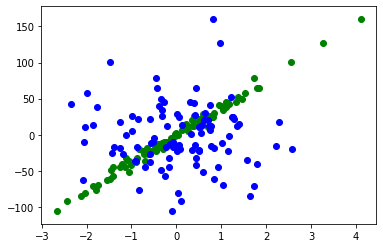

In [3]:
pylab.scatter(data[:,0], target, color = 'g')
pylab.scatter(data[:,1], target, color = 'b')

In [4]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

### LinearRegression

In [5]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [6]:
print(test_labels)

[-18.86438755 -45.27502383  20.87713077 -13.26392817 -16.85466265
  39.70663436 101.14760598 -61.47026695 -18.57607726  18.17188553
 -27.02798161 -21.48288019 -19.36956003   4.45578287   0.34799656
  11.96165156 -80.80239408 -71.3715844   28.15553021 126.64909941
  64.19559505 -76.75213382 -37.31870104  41.95683853 -32.71074998
 -26.87743177 -36.69728864  19.66406455 -17.27897399 -45.38589148]


In [7]:
print(predictions)

[-18.38463838 -48.59351617  12.99081821 -16.52784576 -15.91540572
  37.52999992  96.72696547 -57.24094684 -25.62665582  18.64267643
 -24.84571722 -24.88796757 -32.26300663   9.22849061  -2.18261323
  13.20258458 -78.43589083 -72.024191    22.28846774 124.30752439
  69.28777595 -68.94175257 -34.98805908  44.31212668 -43.88467641
 -28.0121506  -27.19262103  25.83454823 -13.54001317 -43.8251595 ]


In [8]:
metrics.mean_absolute_error(test_labels, predictions)

4.112015699162083

In [9]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779697, std: 1.0737104492890193


In [10]:
# Так как среднее отрицательное число, создадим собственную метрику с параметром "greater_is_better=True". 
# Это не так, но в итоге не нужно искуственно умножать метрику на (-1)
scorer=metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [11]:
linear_scoring=model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'. format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890193


In [12]:
coef

array([38.07925837,  0.        ])

In [13]:
linear_regressor.coef_

array([38.12512926, -0.09180354])

In [14]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.6440644538530927

In [15]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [16]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.13*x1 + -0.09*x2 + -0.64


### Lasso

In [17]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [18]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [19]:
print(lasso_regressor.coef_)

[37.27792576 -0.        ]


In [20]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.28*x1 + -0.00*x2
